# COMP565 Final Project
Code used for the final project for COMP565, Machine Learning in Genomics and Healthcare

In [48]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import linear_model 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

#from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [49]:
#!jupyter --version

#from platform import python_version
#print(python_version())

In [50]:
fin = "460_ALU_TypeREF_MELT2_GIAB_test-version.csv"

In [51]:
df = pd.read_csv(fin)
df = df.astype(str)
df

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1
...,...,...,...,...,...,...,...,...,...,...,...,...
455,X,112877030,112877339,0/1,1,9,1/1,0,7,0/1,"-58,-16.26,-204.01",1/1
456,X,119643326,119643628,1/1,0,16,1/1,0,9,0/1,"-110.2,-25.29,-276.02",1/1
457,X,135157998,135158310,1/1,0,14,1/1,0,14,0/1,"-81.2,-15.65,-144.02",1/1
458,X,138384911,138385220,1/1,0,6,1/1,0,12,0/1,"-34.8,-12.64,-180.01",1/1


In [52]:
#df["merged_name"] = "chr" + df["CHR"] + ":" + df["START"] + "-" + df["STOP"]
df["merged_name"] = "chr" + df["CHR"] + ":" + df["START"].str[:6]
df["merged_name2"] = df["merged_name"].str[:10]
df["merged_name3"] = df["merged_name"].str[:9]
df

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB,merged_name,merged_name2,merged_name3
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1,chr1:104719,chr1:10471,chr1:1047
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1,chr1:145026,chr1:14502,chr1:1450
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1,chr1:173944,chr1:17394,chr1:1739
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1,chr1:184937,chr1:18493,chr1:1849
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1,chr1:217917,chr1:21791,chr1:2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,X,112877030,112877339,0/1,1,9,1/1,0,7,0/1,"-58,-16.26,-204.01",1/1,chrX:112877,chrX:11287,chrX:1128
456,X,119643326,119643628,1/1,0,16,1/1,0,9,0/1,"-110.2,-25.29,-276.02",1/1,chrX:119643,chrX:11964,chrX:1196
457,X,135157998,135158310,1/1,0,14,1/1,0,14,0/1,"-81.2,-15.65,-144.02",1/1,chrX:135157,chrX:13515,chrX:1351
458,X,138384911,138385220,1/1,0,6,1/1,0,12,0/1,"-34.8,-12.64,-180.01",1/1,chrX:138384,chrX:13838,chrX:1383


In [53]:
df_01 = df[df["GIAB"] == "0/1"]
df_01["merged_name3"].to_csv("GIAB_460_10_loci_3.csv", index=False, header=False)

In [54]:
df_11 = df[df["GIAB"] == "1/1"]
df_11["merged_name3"].to_csv("GIAB_460_11_loci_3.csv", index=False, header=False)

In [55]:
df_01

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB,merged_name,merged_name2,merged_name3
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1,chr1:104719,chr1:10471,chr1:1047
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1,chr1:145026,chr1:14502,chr1:1450
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1,chr1:173944,chr1:17394,chr1:1739
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1,chr1:184937,chr1:18493,chr1:1849
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1,chr1:217917,chr1:21791,chr1:2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,21,30601827,30602144,0/1,34,14,0/1,39,12,0/1,"-81.21,-32.51,-435.02",0/1,chr21:306018,chr21:3060,chr21:306
223,21,38961715,38961986,0/1,27,7,0/1,23,3,0/1,"-24.4,-17.46,-264.04",0/1,chr21:389617,chr21:3896,chr21:389
224,21,41586880,41587182,0/1,27,10,0/1,44,9,0/1,"-34.81,-18.66,-249.01",0/1,chr21:415868,chr21:4158,chr21:415
225,21,41957251,41957376,0/1,14,11,0/1,21,12,0/1,"-46.41,-25.29,-346.01",0/1,chr21:419572,chr21:4195,chr21:419


# Part 2

In [56]:
f00 = "GIAB_00_f2.csv"
f10 = "GIAB_10_f2.csv"
f11 = "GIAB_11_f2.csv"

In [57]:
df00 = pd.read_csv(f00, header=None)
df10 = pd.read_csv(f10, header=None)
df11 = pd.read_csv(f11, header=None)
df00 = df00.astype(str)
df10 = df10.astype(str)
df11 = df11.astype(str)
df00

,0
0,chr10:2402963-2403297/ 0/0 210 12 222
1,chr10:51539308-51539401/ 0/0 52 18 70
2,chr10:75969790-75970127/ 0/0 248 22 270
3,chr10:79764973-79765218/ 0/0 188 20 208
4,chr10:8516524-8516843/ 0/0 218 22 240
...,...
95,chr9:77503386-77503546/ 0/0 96 46 142
96,chrX:113850728-113851049/ 0/0 84 12 96
97,chrX:43238081-43238371/ 0/0 74 12 86
98,chrX:54290473-54290777/ 0/0 112 4 116


In [58]:
# split column into multiple columns by delimiter 
df00 = df00[0].str.split(' ', expand=True)
df10 = df10[0].str.split(' ', expand=True)
df11 = df11[0].str.split(' ', expand=True)

df00

,0,1,2,3,4
0,chr10:2402963-2403297/,0/0,210,12,222
1,chr10:51539308-51539401/,0/0,52,18,70
2,chr10:75969790-75970127/,0/0,248,22,270
3,chr10:79764973-79765218/,0/0,188,20,208
4,chr10:8516524-8516843/,0/0,218,22,240
...,...,...,...,...,...
95,chr9:77503386-77503546/,0/0,96,46,142
96,chrX:113850728-113851049/,0/0,84,12,96
97,chrX:43238081-43238371/,0/0,74,12,86
98,chrX:54290473-54290777/,0/0,112,4,116


In [59]:
# locus = dir_name
df00.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df10.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df11.columns = ["locus", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df00

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297/,0/0,210,12,222
1,chr10:51539308-51539401/,0/0,52,18,70
2,chr10:75969790-75970127/,0/0,248,22,270
3,chr10:79764973-79765218/,0/0,188,20,208
4,chr10:8516524-8516843/,0/0,218,22,240
...,...,...,...,...,...
95,chr9:77503386-77503546/,0/0,96,46,142
96,chrX:113850728-113851049/,0/0,84,12,96
97,chrX:43238081-43238371/,0/0,74,12,86
98,chrX:54290473-54290777/,0/0,112,4,116


In [60]:
dict_type_convert = {"f2_count_REF": int, "f2_count_ALT": int, "f2_count": int}
df00 = df00.astype(dict_type_convert)
df10 = df10.astype(dict_type_convert)
df11 = df11.astype(dict_type_convert)
# print(df00.dtypes)

In [61]:
frames = [df00, df10, df11]
df_560 = pd.concat(frames)
# Remove the '/' at the end of directory name
df_560["locus"] = df_560["locus"].str.split("/").str[0]
df_560

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297,0/0,210,12,222
1,chr10:51539308-51539401,0/0,52,18,70
2,chr10:75969790-75970127,0/0,248,22,270
3,chr10:79764973-79765218,0/0,188,20,208
4,chr10:8516524-8516843,0/0,218,22,240
...,...,...,...,...,...
231,chrX:112877016-112877360,1/1,24,38,62
232,chrX:119643312-119643638,1/1,24,62,86
233,chrX:135157983-135158330,1/1,24,46,70
234,chrX:138384895-138385237,1/1,16,44,60


In [62]:
df_560.sample(5)

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
194,chr7:47895171-47895518,1/0,90,76,166
151,chr5:13895083-13895389,1/1,40,90,130
46,chr2:43239574-43239730,0/0,124,34,158
149,chr4:9952291-9952559,1/1,50,40,90
191,chr7:136851611-136851936,1/1,42,86,128


In [63]:
df_560.groupby(by="GIAB_genotype")["f2_count_REF"].mean()

GIAB_genotype
0/0    171.900000
1/0     90.348214
1/1     45.737288
Name: f2_count_REF, dtype: float64

In [64]:
df_560["GIAB_genotype"] = df_560["GIAB_genotype"].map({"0/0":0,
                             "1/0":1,
                             "1/1":2,
                             np.nan:3},
                             na_action=None)
df_560

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297,0,210,12,222
1,chr10:51539308-51539401,0,52,18,70
2,chr10:75969790-75970127,0,248,22,270
3,chr10:79764973-79765218,0,188,20,208
4,chr10:8516524-8516843,0,218,22,240
...,...,...,...,...,...
231,chrX:112877016-112877360,2,24,38,62
232,chrX:119643312-119643638,2,24,62,86
233,chrX:135157983-135158330,2,24,46,70
234,chrX:138384895-138385237,2,16,44,60


In [65]:
df_560.sample(5)

,locus,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
200,chr8:106670519-106670854,1,74,72,146
32,chr12:40006890-40007232,1,98,52,150
99,chr21:38961701-38961997,1,70,32,102
61,chr16:12002199-12002335,1,98,28,126
124,chr3:123236747-123237072,2,48,100,148


In [66]:
y = df_560["GIAB_genotype"].to_numpy()
X = df_560.iloc[:, 2:].to_numpy()

## Multiple linear regression

In [ ]:
lin_regr = linear_

## Random Forest

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [21]:
clf_rf = RandomForestClassifier(n_estimators=20, random_state=0)
clf_rf.fit(X_train, y_train)
y_pred = clf_rf.predict(X_test)

In [22]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[21  4  0]
 [ 2 39  4]
 [ 0  1 41]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.89      0.87      0.88        45
           2       0.91      0.98      0.94        42

    accuracy                           0.90       112
   macro avg       0.90      0.89      0.90       112
weighted avg       0.90      0.90      0.90       112

0.9017857142857143


In [23]:
# 5-fold cross-validation
scores_rf = cross_val_score(clf_rf, X_train, y_train, cv=5)
print(scores_rf.mean())

0.8883395755305867


## SVM - Support Vector Machine

### Using linear (with linear boundary) as kernel

In [24]:
"""pred=model.predict(x_test)
Model Evaluation
# Importing the classification report and confusion matrix

print(confusion_matrix(y_test,pred))
[[17  0  0]
 [ 0 16  0]
 [ 0  0 12]]
print(classification_report(y_test, pred))"""

'pred=model.predict(x_test)\nModel Evaluation\n# Importing the classification report and confusion matrix\n\nprint(confusion_matrix(y_test,pred))\n[[17  0  0]\n [ 0 16  0]\n [ 0  0 12]]\nprint(classification_report(y_test, pred))'

In [84]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2)
# To generate the same test set every time, set "random_state=42"

In [85]:
# Normalizing data
mean = X_train.mean()
std = X_train.std()
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [86]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
# 5-fold cross-validation
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())

0.8907116104868914


[[ 1.83085078 -2.08055594 -0.24970517]
 [ 1.20699288 -0.60347742  0.60351545]
 [ 2.27671545 -1.63211422  0.64460123]]


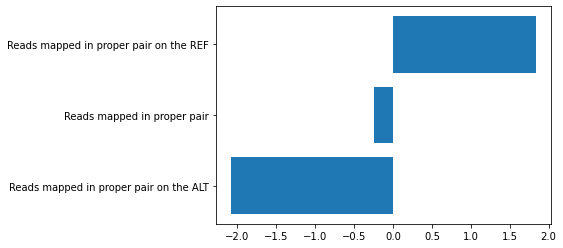

array([1, 2, 0, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 2, 1, 2, 2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 0,
       2, 1, 2, 0, 2, 0, 1, 0, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 0, 1, 0, 2, 1, 1, 2, 2, 0, 2,
       0, 1], dtype=int64)

In [87]:
def feature_importances(coef, names):
    imp = coef
    imp, names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.show()
features_names = ["Reads mapped in proper pair on the REF", "Reads mapped in proper pair on the ALT" ,"Reads mapped in proper pair"]
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
svm_lin = clf.fit(X_train, y_train)
print(svm_lin.coef_)
feature_importances(svm_lin.coef_[0], features_names)


pred_lin = clf.predict(X_test)
pred_lin

In [88]:
# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))
print(accuracy_score(y_test, pred_lin))

[[19  1  0]
 [ 4 44  1]
 [ 1  2 40]]
              precision    recall  f1-score   support

           0       0.79      0.95      0.86        20
           1       0.94      0.90      0.92        49
           2       0.98      0.93      0.95        43

    accuracy                           0.92       112
   macro avg       0.90      0.93      0.91       112
weighted avg       0.93      0.92      0.92       112

0.9196428571428571


### Using rbf (with non-linear boundary) as kernel

In [90]:
# Using kernel, rbf
clf = svm.SVC(kernel="rbf")
#clf.fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=5)
print(scores.mean())
#print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))
#print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

0.8884394506866418


## DNN - Deep Neural Network

In [31]:
encoder = LabelBinarizer()
seed = 42

df_GIAB_2_X = pd.DataFrame(data=X, columns=["f2_count_REF", "f2_count_ALT", "f2_count"],
                       dtype=np.float32)
df_GIAB_2_X

,f2_count_REF,f2_count_ALT,f2_count
0,210.0,12.0,222.0
1,52.0,18.0,70.0
2,248.0,22.0,270.0
3,188.0,20.0,208.0
4,218.0,22.0,240.0
...,...,...,...
555,24.0,38.0,62.0
556,24.0,62.0,86.0
557,24.0,46.0,70.0
558,16.0,44.0,60.0


In [32]:
target = encoder.fit_transform(y)
df_GIAB_2_y = pd.DataFrame(data=target, columns=["0/0", "1/0", "1/1"])
df_GIAB_2_y

,0/0,1/0,1/1
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
555,0,0,1
556,0,0,1
557,0,0,1
558,0,0,1


In [33]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """buiding the Keras model callback"""
    model = Sequential()
    model.add(Dense(6, input_dim=3, activation='relu', name='layer_1')) # tahn
    model.add(Dense(10, activation='relu', name='layer_2')) # tahn
    model.add(Dense(3, activation='softmax', name='output_layer'))
     
    opt = keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss="categorical_crossentropy",
                  optimizer=opt,
                  metrics=['accuracy'])


    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

<ipython-input-33-e0a2884a41fd>:30: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(


In [34]:
history = estimator.fit(X_train, y_train)

Epoch 1/200
23/23 - 1s - loss: 1.0611 - accuracy: 0.3527 - 737ms/epoch - 32ms/step
Epoch 2/200
23/23 - 0s - loss: 0.9124 - accuracy: 0.4643 - 28ms/epoch - 1ms/step
Epoch 3/200
23/23 - 0s - loss: 0.7114 - accuracy: 0.7143 - 36ms/epoch - 2ms/step
Epoch 4/200
23/23 - 0s - loss: 0.5336 - accuracy: 0.8192 - 46ms/epoch - 2ms/step
Epoch 5/200
23/23 - 0s - loss: 0.4336 - accuracy: 0.8594 - 40ms/epoch - 2ms/step
Epoch 6/200
23/23 - 0s - loss: 0.3905 - accuracy: 0.8728 - 41ms/epoch - 2ms/step
Epoch 7/200
23/23 - 0s - loss: 0.3633 - accuracy: 0.8884 - 45ms/epoch - 2ms/step
Epoch 8/200
23/23 - 0s - loss: 0.3407 - accuracy: 0.8839 - 44ms/epoch - 2ms/step
Epoch 9/200
23/23 - 0s - loss: 0.3255 - accuracy: 0.8906 - 35ms/epoch - 2ms/step
Epoch 10/200
23/23 - 0s - loss: 0.3108 - accuracy: 0.8929 - 35ms/epoch - 2ms/step
Epoch 11/200
23/23 - 0s - loss: 0.3024 - accuracy: 0.8929 - 32ms/epoch - 1ms/step
Epoch 12/200
23/23 - 0s - loss: 0.2908 - accuracy: 0.8996 - 39ms/epoch - 2ms/step
Epoch 13/200
23/23 - 0s

Epoch 101/200
23/23 - 0s - loss: 0.2481 - accuracy: 0.8862 - 85ms/epoch - 4ms/step
Epoch 102/200
23/23 - 0s - loss: 0.2452 - accuracy: 0.8951 - 47ms/epoch - 2ms/step
Epoch 103/200
23/23 - 0s - loss: 0.2437 - accuracy: 0.8906 - 81ms/epoch - 4ms/step
Epoch 104/200
23/23 - 0s - loss: 0.2470 - accuracy: 0.8929 - 64ms/epoch - 3ms/step
Epoch 105/200
23/23 - 0s - loss: 0.2396 - accuracy: 0.8906 - 82ms/epoch - 4ms/step
Epoch 106/200
23/23 - 0s - loss: 0.2374 - accuracy: 0.8973 - 49ms/epoch - 2ms/step
Epoch 107/200
23/23 - 0s - loss: 0.2378 - accuracy: 0.8951 - 40ms/epoch - 2ms/step
Epoch 108/200
23/23 - 0s - loss: 0.2449 - accuracy: 0.8929 - 36ms/epoch - 2ms/step
Epoch 109/200
23/23 - 0s - loss: 0.2361 - accuracy: 0.8951 - 35ms/epoch - 2ms/step
Epoch 110/200
23/23 - 0s - loss: 0.2418 - accuracy: 0.9018 - 31ms/epoch - 1ms/step
Epoch 111/200
23/23 - 0s - loss: 0.2363 - accuracy: 0.9018 - 62ms/epoch - 3ms/step
Epoch 112/200
23/23 - 0s - loss: 0.2363 - accuracy: 0.8973 - 46ms/epoch - 2ms/step
Epoc

Epoch 200/200
23/23 - 0s - loss: 0.2414 - accuracy: 0.8973 - 124ms/epoch - 5ms/step


In [35]:
history.history["accuracy"]

[0.3526785671710968,
 0.4642857015132904,
 0.7142857313156128,
 0.8191964030265808,
 0.859375,
 0.8727678656578064,
 0.8883928656578064,
 0.8839285969734192,
 0.890625,
 0.8928571343421936,
 0.8928571343421936,
 0.8995535969734192,
 0.8950892686843872,
 0.8973214030265808,
 0.890625,
 0.8839285969734192,
 0.8883928656578064,
 0.890625,
 0.890625,
 0.8861607313156128,
 0.8973214030265808,
 0.8928571343421936,
 0.8928571343421936,
 0.890625,
 0.8861607313156128,
 0.9017857313156128,
 0.8861607313156128,
 0.8928571343421936,
 0.890625,
 0.8928571343421936,
 0.9017857313156128,
 0.8995535969734192,
 0.8950892686843872,
 0.890625,
 0.8950892686843872,
 0.8995535969734192,
 0.8794642686843872,
 0.890625,
 0.890625,
 0.8995535969734192,
 0.8973214030265808,
 0.8973214030265808,
 0.8995535969734192,
 0.8928571343421936,
 0.890625,
 0.8928571343421936,
 0.8973214030265808,
 0.9040178656578064,
 0.8950892686843872,
 0.8950892686843872,
 0.8973214030265808,
 0.8995535969734192,
 0.886160731315612

In [36]:
history.history["loss"]

[1.0610862970352173,
 0.9124262928962708,
 0.7113828659057617,
 0.5335744619369507,
 0.4335537850856781,
 0.3905321955680847,
 0.36333417892456055,
 0.34070974588394165,
 0.3254624903202057,
 0.31082701683044434,
 0.3024297058582306,
 0.29083743691444397,
 0.29356685280799866,
 0.2899121940135956,
 0.2793809473514557,
 0.2912500202655792,
 0.278583288192749,
 0.2717331051826477,
 0.26246681809425354,
 0.2618650794029236,
 0.25386127829551697,
 0.2515709102153778,
 0.25244325399398804,
 0.25722917914390564,
 0.25817468762397766,
 0.24885497987270355,
 0.25041598081588745,
 0.25418707728385925,
 0.2517719864845276,
 0.2578006088733673,
 0.2557400166988373,
 0.24711953103542328,
 0.2470986545085907,
 0.24817712604999542,
 0.24724939465522766,
 0.24818679690361023,
 0.2530880868434906,
 0.2657865583896637,
 0.25816988945007324,
 0.2428264319896698,
 0.24036455154418945,
 0.24173270165920258,
 0.24730591475963593,
 0.24446773529052734,
 0.2495483011007309,
 0.24640445411205292,
 0.242582485

In [37]:
estimator.predict(X_test)

array([2, 2, 1, 0, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 0,
       2, 2, 1, 2, 0, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 2, 0, 2, 2, 0, 1, 1,
       2, 2, 1, 0, 0, 0, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1,
       1, 0, 2, 1, 1, 1, 1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       0, 2, 1, 1, 1, 2, 1, 0, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 1, 0, 1, 2,
       0, 2])

In [38]:
y_test

,0/0,1/0,1/1
453,0,0,1
341,0,0,1
177,0,1,0
86,1,0,0
332,0,0,1
...,...,...,...
88,1,0,0
235,0,1,0
352,0,0,1
33,1,0,0


In [39]:
y_test2 = y_test.copy()
y_test2["genotype"] = 0
y_test2["genotype"] = np.where(y_test2["0/0"]==1, 0, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/0"]==1, 1, y_test2["genotype"])
y_test2["genotype"] = np.where(y_test2["1/1"]==1, 2, y_test2["genotype"])
y_test2

,0/0,1/0,1/1,genotype
453,0,0,1,2
341,0,0,1,2
177,0,1,0,1
86,1,0,0,0
332,0,0,1,2
...,...,...,...,...
88,1,0,0,0
235,0,1,0,1
352,0,0,1,2
33,1,0,0,0


In [40]:
y_test = y_test2["genotype"].to_numpy()

In [41]:
pred_DNN = estimator.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, pred_DNN))
print(classification_report(y_test, pred_DNN))
print(accuracy_score(y_test, pred_DNN))

[[24  2  0]
 [ 1 42  1]
 [ 0  3 39]]
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        26
           1       0.89      0.95      0.92        44
           2       0.97      0.93      0.95        42

    accuracy                           0.94       112
   macro avg       0.94      0.94      0.94       112
weighted avg       0.94      0.94      0.94       112

0.9375


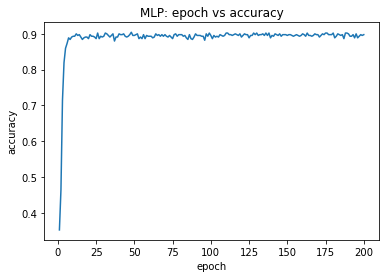

In [42]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_accuracy = history.history['accuracy']
plt.title("MLP: epoch vs accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(lst_epoch, lst_accuracy) 

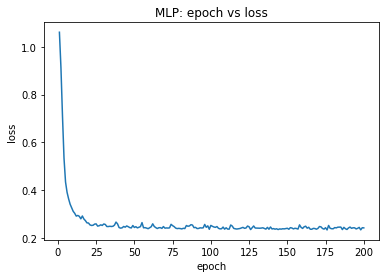

In [43]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_loss = history.history['loss']
plt.title("MLP: epoch vs loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.plot(lst_epoch, lst_loss) 

In [44]:
model2 = Sequential()
model2.add(Dense(6, input_dim=3, activation='relu', name='layer_1'))
model2.add(Dense(10, activation='relu', name='layer_2'))
model2.add(Dense(3, activation='softmax', name='output_layer'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [45]:
model().fit(X_train, y_train, epochs=200)

Epoch 1/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0742 - accuracy: 0.5647
Epoch 2/200
14/14 [==============================] - 0s 1ms/step - loss: 0.9814 - accuracy: 0.6875
Epoch 3/200
14/14 [==============================] - 0s 1ms/step - loss: 0.8767 - accuracy: 0.5290
Epoch 4/200
14/14 [==============================] - 0s 1ms/step - loss: 0.7507 - accuracy: 0.6964
Epoch 5/200
14/14 [==============================] - 0s 1ms/step - loss: 0.6305 - accuracy: 0.7076
Epoch 6/200
14/14 [==============================] - 0s 1ms/step - loss: 0.5364 - accuracy: 0.8281
Epoch 7/200
14/14 [==============================] - 0s 1ms/step - loss: 0.4736 - accuracy: 0.8571
Epoch 8/200
14/14 [==============================] - 0s 1ms/step - loss: 0.4483 - accuracy: 0.8683
Epoch 9/200
14/14 [==============================] - 0s 1ms/step - loss: 0.4326 - accuracy: 0.8705
Epoch 10/200
14/14 [==============================] - ETA: 0s - loss: 0.4726 - accuracy: 0.78 - 0s 1ms/step -

14/14 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8683
Epoch 83/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.8772
Epoch 84/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3952 - accuracy: 0.8638
Epoch 85/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3969 - accuracy: 0.8638
Epoch 86/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3910 - accuracy: 0.8795
Epoch 87/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3909 - accuracy: 0.8817
Epoch 88/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3939 - accuracy: 0.8616
Epoch 89/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3978 - accuracy: 0.8795
Epoch 90/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3927 - accuracy: 0.8683
Epoch 91/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3917 - accuracy: 0.8817
Epoch 92/200


14/14 [==============================] - 0s 6ms/step - loss: 0.3944 - accuracy: 0.8795
Epoch 164/200
14/14 [==============================] - 0s 6ms/step - loss: 0.3932 - accuracy: 0.8817
Epoch 165/200
14/14 [==============================] - 0s 3ms/step - loss: 0.3967 - accuracy: 0.8616
Epoch 166/200
14/14 [==============================] - 0s 2ms/step - loss: 0.4066 - accuracy: 0.8549
Epoch 167/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3938 - accuracy: 0.8839
Epoch 168/200
14/14 [==============================] - 0s 1ms/step - loss: 0.4101 - accuracy: 0.8527
Epoch 169/200
14/14 [==============================] - 0s 1ms/step - loss: 0.4055 - accuracy: 0.8527
Epoch 170/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3967 - accuracy: 0.8683
Epoch 171/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3929 - accuracy: 0.8772
Epoch 172/200
14/14 [==============================] - 0s 1ms/step - loss: 0.3948 - accuracy: 0.8884
Epoc

In [46]:
model().predict(X_test)
#score = model.evaluate(x_test, y_test, verbose = 0) 

array([[0.33333334, 0.33333334, 0.33333334],
       [0.33387464, 0.33331496, 0.33281034],
       [0.33901238, 0.33311304, 0.32787457],
       [0.35399243, 0.3291437 , 0.31686386],
       [0.34158024, 0.33174315, 0.32667667],
       [0.33673474, 0.33320865, 0.33005658],
       [0.33673474, 0.33320865, 0.33005658],
       [0.33797792, 0.33315772, 0.32886443],
       [0.34205687, 0.33297017, 0.324973  ],
       [0.33333334, 0.33333334, 0.33333334],
       [0.33333334, 0.33333334, 0.33333334],
       [0.33531487, 0.3332634 , 0.33142182],
       [0.33921823, 0.33310392, 0.3276778 ],
       [0.34315082, 0.33291465, 0.32393456],
       [0.34775347, 0.33053827, 0.32170826],
       [0.33913562, 0.3331076 , 0.32775673],
       [0.33842018, 0.332949  , 0.32863075],
       [0.3410105 , 0.33302122, 0.3259683 ],
       [0.33838055, 0.33314055, 0.32847887],
       [0.33761665, 0.3331728 , 0.32921052],
       [0.33333334, 0.33333334, 0.33333334],
       [0.3508566 , 0.3299138 , 0.31922957],
       [0.

In [47]:
model().evaluate(X_test, y_test)

ValueError: in user code:

    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\training.py", line 1366, in test_function  *
        return step_function(self, iterator)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\training.py", line 1356, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\training.py", line 1349, in run_step  **
        outputs = model.test_step(data)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\training.py", line 1305, in test_step
        self.compiled_loss(
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\Yumika\anaconda3-2\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (None, 1) and (None, 3) are incompatible


In [ ]:
pred_for_val = estimator.predict(dtest_for_val_ini)

In [ ]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Model Performance: mean: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
results

In [ ]:
clf = svm.SVC(kernel="linear", C=1, max_iter=1000)
clf.fit(X_train, y_train)
pred_lin = clf.predict(X_test)

# Evaluate the model
print(confusion_matrix(y_test, pred_lin))
print(classification_report(y_test, pred_lin))